<a href="https://colab.research.google.com/github/Nidhu2212/m/blob/main/Marketing_Campaign_Perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Performance Insights**

Objective:

This project analyzes digital marketing campaigns to optimize ROI and performance by examining key metrics like conversion rates, acquisition costs, and ROI across various channels, campaign types, and audience segments. It explores temporal trends, geographical influences, and audience behavior to identify success factors and enhance future marketing strategies.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Marketing Campaign Perfomance.csv")

*Descriptive Analysis*

In [ ]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,01-01-2021
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,02-01-2021
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,03-01-2021
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,04-01-2021
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,05-01-2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [ ]:
df.describe().round(2)

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00
mean,100000.50,0.08,5.00,549.77,5507.30,5.49
std,57735.17,0.04,1.73,260.02,2596.86,2.87
min,1.00,0.01,2.00,100.00,1000.00,1.00
25%,50000.75,0.05,3.50,325.00,3266.00,3.00
50%,100000.50,0.08,5.01,550.00,5517.50,5.00
75%,150000.25,0.12,6.51,775.00,7753.00,8.00
max,200000.00,0.15,8.00,1000.00,10000.00,10.00


*Data exploration :*

From the descriptive statistics and nunique function, we can clearly identify that "Campaign_ID" is the "primary key" in the dataset and moreover we don't have any duplicates in our dataset.

In [ ]:
print("Number of Unique Values:", df.Campaign_ID.nunique())

Number of Unique Values: 200000


In [ ]:
print("Unique Values in Location Attribute:\n\n", df.Location.unique(),
      "\n\nUnique Values in Customer_Segment Attribute:\n\n", df.Customer_Segment.unique())

Unique Values in Location Attribute:

 ['Chicago' 'New York' 'Los Angeles' 'Miami' 'Houston'] 

Unique Values in Customer_Segment Attribute:

 ['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


*   Occurrences of each category in the "Campaign_Type" and "Channel_Used" columns. This shows that there is no significant difference in count of each values. The data is evenly distributed.

In [ ]:
df.Campaign_Type.value_counts()

,count
Campaign_Type,
Influencer,40169
Search,40157
Display,39987
Email,39870
Social Media,39817


In [ ]:
df.Channel_Used.value_counts()

,count
Channel_Used,
Email,33599
Google Ads,33438
YouTube,33392
Instagram,33392
Website,33360
Facebook,32819


### Exploratory Data Analysis (EDA) and Visualization

*   The bar plot suggests that the marketing efforts are generally successful across all channels and campaign types, with only minor variations in performance.
*   Influencer campaigns (blue bars) tend to have slightly higher conversion rates across most channels, particularly on Facebook and websites. This indicates that influencer marketing may be a particularly effective strategy.
*   Interestingly, email campaigns have the highest conversion rate on Instagram, suggesting a potential synergy between email and Instagram marketing.
*   Social Media Campaign Type has slightly lower conversion rates on Facebook and Instagram, which is somewhat unexpected given these are social platforms.
*   Display ads (purple bars) show consistent performance across channels, with a slight edge on Facebook.
*   Search campaigns (orange bars) perform relatively well across all channels.

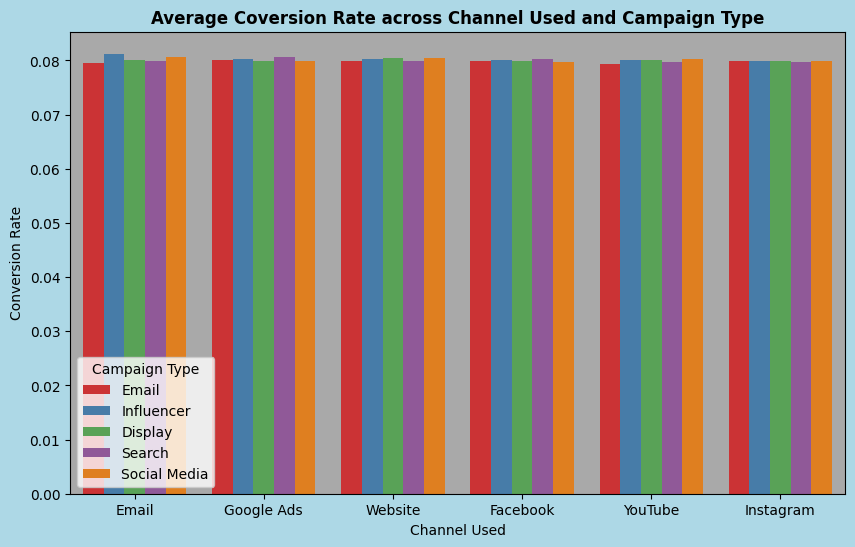

In [ ]:
order_CR = df.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightblue')

sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df, order=order_CR, palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average Coversion Rate across Channel Used and Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()

## **Engagement Score by Campaign Type**

*  There don't appear to be any significant outliers for any campaign type.
*  All campaign types show generally good engagement, with most scores falling between 3 and 8.
*  The median and interquartile range shows equal performance among the Campaign Types with considerable overlap in the engagement scores.


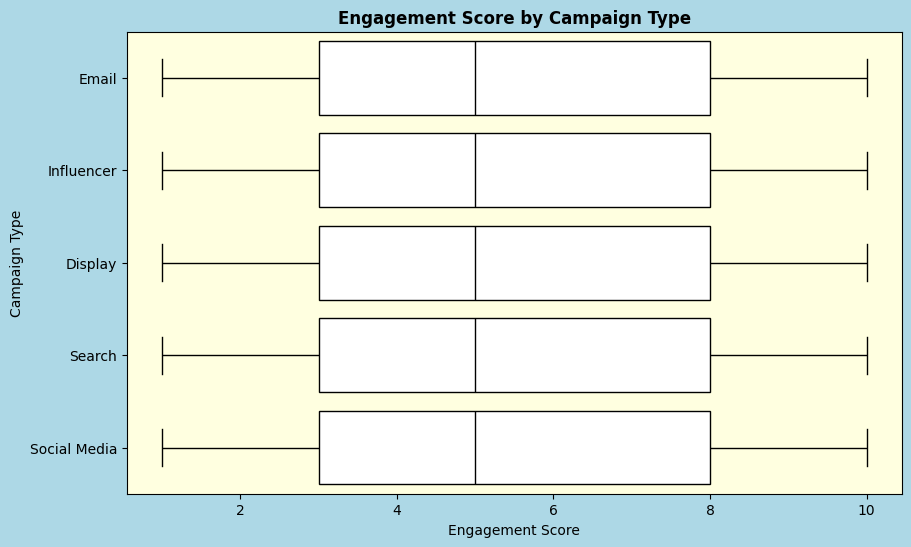

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightblue')

sns.boxplot(x='Engagement_Score', y='Campaign_Type', data=df, color='white', linecolor='black')

plt.gca().set_facecolor('lightyellow')

plt.title('Engagement Score by Campaign Type', fontweight='bold')
plt.xlabel('Engagement Score')
plt.ylabel('Campaign Type')

plt.show()

### **Average Return of Investment by Company**

*   All most all the companies in the dataset have uniform average ROI, indicating equal performance and competition. But, "Alpha Innovations" and "NextGen Systems" has a bit taller bar which shows they are the forerunners in the dataset in terms of efficiency.

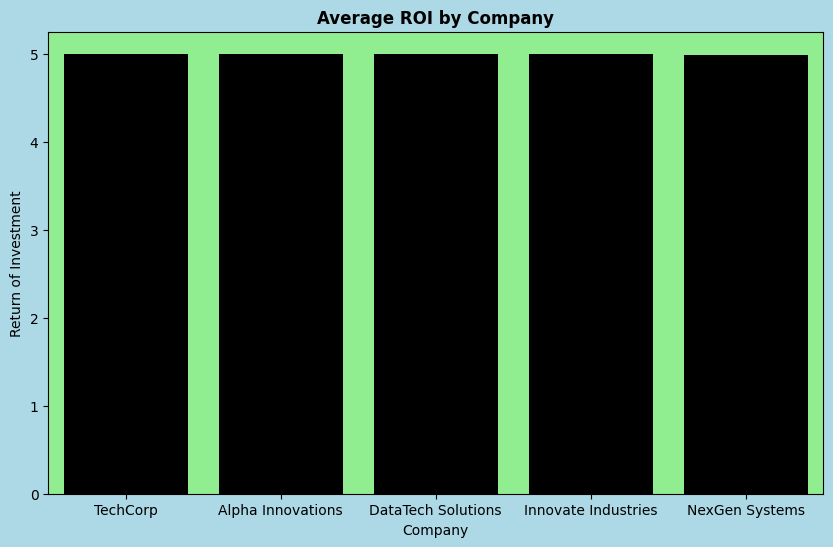

In [ ]:
order_ROI = df.groupby('Company')['ROI'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightblue')

sns.barplot(x='Company', y='ROI', data=df, order=order_ROI, color='black', errorbar=None)

plt.gca().set_facecolor('lightgreen')

plt.title('Average ROI by Company', fontweight='bold')
plt.ylabel('Return of Investment')

plt.show()

### Distribution of Total Return of Investment across Channels Used

*   The ROI is relatively evenly distributed across all channels, with percentages ranging from 16.5% to 16.8%. This suggests a balanced marketing strategy where no single channel dominates.
*   Combined, social media channels (Facebook, Instagram, YouTube) account for 49.9% of total ROI, highlighting good adaptation to modern marketing trends.
*  The company's website contributes 16.7% to the total ROI, suggesting it's an important part of the overall strategy.
*   With 16.7% ROI, website remains a valuable channel despite the rise of social media.
*   At 16.7%, YouTube's contribution is notable, indicating video content is an important part of the marketing strategy.
*   Given the close percentages, even small improvements in any channel could significantly impact overall marketing performance.



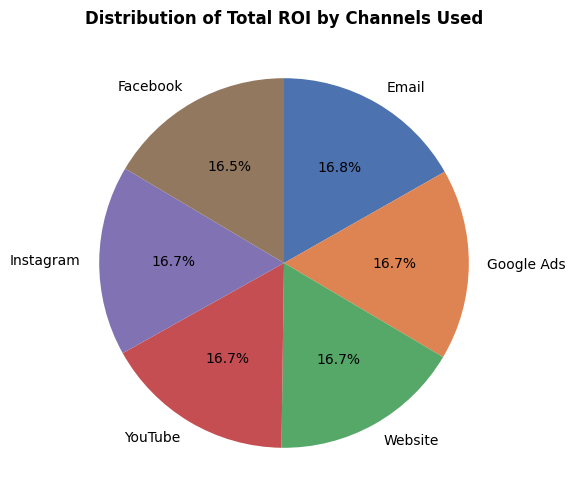

In [ ]:
pie = df.groupby(by='Channel_Used')['ROI'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6), facecolor='white')

color = sns.color_palette('deep', len(pie))

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.title('Distribution of Total ROI by Channels Used', fontweight='bold')

plt.show()

### **Correlation between Engagement Score and Conversion Rate**



*   From the HeatMap we can clearly see that there is a very weak positive relationship (independent) between "Conversion Rate" and "Engagement Rate" matrices.


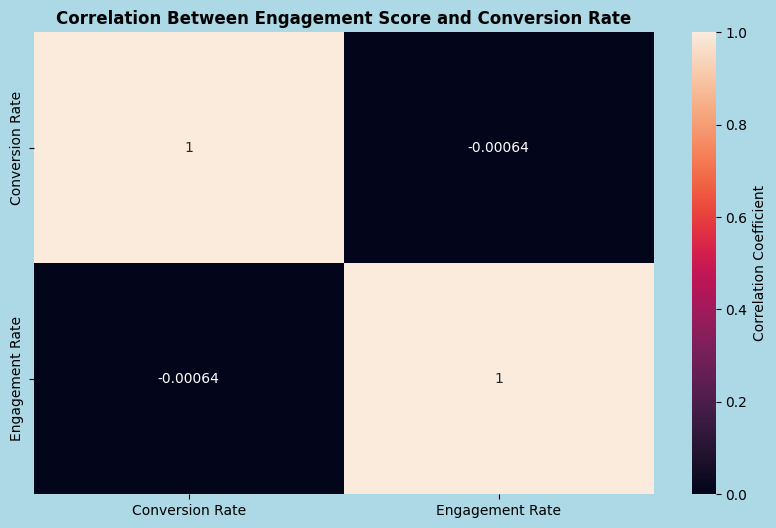

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightblue')

sns.heatmap(df[['Conversion_Rate','Engagement_Score']].corr(), annot=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=['Conversion Rate', 'Engagement Rate'], yticklabels=['Conversion Rate', 'Engagement Rate'])

plt.title('Correlation Between Engagement Score and Conversion Rate', fontweight='bold')

plt.show()

**Distribution of Acquisition Cost across Customer Segment by Channel Used**

*   Unlike typical box plots, this chart shows the full range of data without marking any points as outliers.
*  There's significant variation in acquisition costs both within and across customer segments and channels, as shown by the different box sizes and positions.
*  The upper limit of 10,000 is consistent across all segments and channels, indicating a possible cap on acquisition spending.

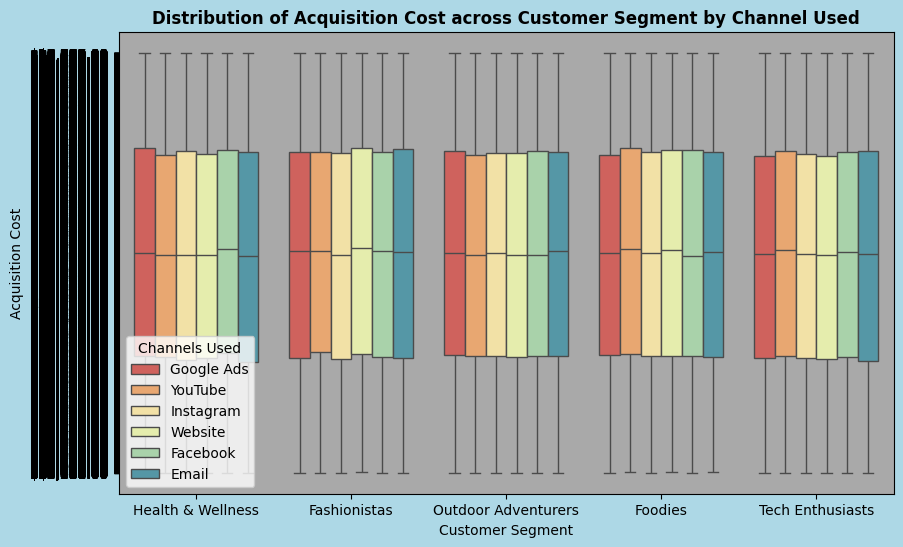

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightblue')

sns.boxplot(y='Acquisition_Cost', x='Customer_Segment', hue='Channel_Used', data=df, palette='Spectral')

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Acquisition Cost across Customer Segment by Channel Used', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channels Used', loc='lower left')

plt.show()

# Conversion Rate by Date (Month)



*   All companies experience a noticeable dip in conversion rates in February and November, potentially indicating an industry-wide challenge or seasonal effect.
*  The period from August to October appears to be the strongest for most companies in terms of conversion rates.
*  'Alpha Innovations' experiences the most volatility in Conversion Rate.
'NexGen' Systems shows a significant spike in September, reaching the highest overall conversion rate.
*  'TechCorp' starts the year with relatively high conversion rates but shows a general declining trend until a recovery in the latter months.
*  'Data Tech Solutions' demonstrates steady growth from June to October before experiencing a sharp decline in November.
*  'Innovate Industry' shows consistent down performance in conversion rate.


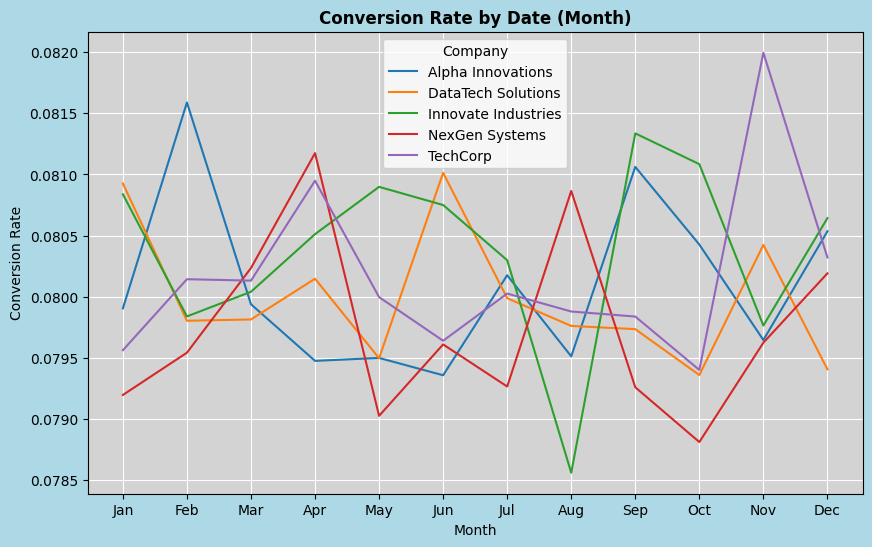

In [ ]:
import calendar

df.Date = pd.to_datetime(df['Date'], format='%d-%m-%Y')

monthly_df = df.groupby([df['Company'], df['Date'].dt.strftime('%b')]).agg({'Conversion_Rate' : 'mean'}).reset_index()

monthly_df['Date'] = pd.Categorical(monthly_df['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10,6), facecolor='lightblue')

sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=monthly_df, errorbar=None)

plt.gca().set_facecolor('lightgrey')

plt.title('Conversion Rate by Date (Month)', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')
plt.grid(True, color='white')

plt.show()